In [1]:
import PhotochemPy as photo
pt = photo.PhotochemPy('input/species.dat','input/reactions.rx')

In [1]:
import numpy as np
from Photochem import photochem
import time

In [2]:
nz = 200
nq = 61
nnp = 4
nsp = 74
nr = 392
ks = 33
kj = 60
photochem.allocate_memory(nz,nq,nnp,nsp,nr,ks,kj)
# now read input files
photochem.read_species('input/speciesOG.dat')
photochem.read_reactions('input/reactions.rx')
photochem.read_planet('input/planet.dat')
photochem.read_photochem('input/input_photchem.dat')
photochem.read_atmosphere('input/atmosphere.txt')
photochem.photgrid(100.0e5)
photochem.densty()
photochem.rates()
photochem.difco()
H2O = photochem.photsatrat(22,photochem.nz)
fval = photochem.dochem(-1,22,photochem.isl,photochem.usol_init)
photochem.ltning(photochem.usol_init)
photochem.aertab()
photochem.initphoto('input/Sun_2.7Ga.txt')
photochem.flux = np.loadtxt('flux.dat')
photochem.initmie(photochem.nw,photochem.wavl,1,0)

# in the loop
start = time.time()

prates = photochem.photo(photochem.zy,photochem.agl,photochem.io2\
                    ,photochem.ino,photochem.usol_init,photochem.kj)
end = time.time()
print('photo',(end-start))

start = time.time()
photochem.rainout(22,0,photochem.usol_init)
end = time.time()
print('rainout',end-start)

start = time.time()
photochem.aercon(photochem.usol_init)
end = time.time()
print('aercon',end-start)

start = time.time()
conver = photochem.sedmnt(photochem.frak,photochem.hcdens, photochem.ihztype,photochem.nz,photochem.np)
end = time.time()
print('sedmnt',end-start)

photo 0.02078244209289551
rainout 0.0013551712036132812
aercon 0.00011801719665527344
sedmnt 0.00024175643920898438


In [3]:
data = np.loadtxt('prates.dat')

In [4]:
for i in range(kj):
#     if data[i] == 0.0:
#         print('ok')
#     else:
    print(i+1,'%.4e'%(prates[i,-1]/data[i]),'%.4e'%(prates[i,-1]),'%.4e'%(data[i]))
#     if not 1.1>(prates[i,-1]/data[i])>.9:
#         print(i+1)

1 1.0130e+00 2.4307e-06 2.3995e-06
2 1.0945e+00 6.2659e-08 5.7250e-08
3 1.0522e+00 8.2665e-06 7.8562e-06
4 1.0013e+00 3.9724e-03 3.9673e-03
5 1.0011e+00 1.0062e-03 1.0051e-03
6 1.0037e+00 5.9414e-05 5.9194e-05
7 1.1308e+00 1.6414e-09 1.4515e-09
8 1.0345e+00 3.0419e-07 2.9406e-07
9 1.0012e+00 3.4887e-05 3.4844e-05
10 1.0013e+00 4.1001e-05 4.0949e-05
11 1.0034e+00 3.8124e-04 3.7996e-04
12 1.0299e+00 1.2615e-04 1.2248e-04
13 1.0944e+00 3.1667e-06 2.8936e-06
14 1.0011e+00 4.0780e-03 4.0736e-03
15 1.0036e+00 2.9347e-04 2.9240e-04
16 1.0077e+00 1.7409e-04 1.7275e-04
17 1.0138e+00 1.1963e-04 1.1801e-04
18 1.0012e+00 1.0855e-03 1.0842e-03
19 1.0011e+00 6.2321e-07 6.2254e-07
20 1.0013e+00 6.7131e-04 6.7044e-04
21 1.0013e+00 6.7131e-04 6.7044e-04
22 1.0013e+00 6.7131e-04 6.7044e-04
23 1.0094e+00 2.7271e-05 2.7018e-05
24 1.0034e+00 3.8124e-04 3.7996e-04
25 1.0013e+00 1.5339e-05 1.5320e-05
26 1.0074e+00 1.6536e-03 1.6414e-03
27 1.0013e+00 1.3518e-04 1.3500e-04
28 1.0482e+00 2.2197e-06 2.1177e-06
2

/Users/nicholas/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [7]:
photochem.sq[0,-1,:118]

array([8.55000000e-19, 5.85000000e-18, 1.20000000e-17, 1.35000000e-17,
       1.20000000e-17, 9.35000000e-18, 5.90000000e-18, 2.80000000e-18,
       9.85000000e-19, 7.39814796e-22, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [4]:
for i in range(nz):
    print(photochem.rpar[i,0],photochem.rpar[i,1],photochem.rpar[i,2],photochem.rpar[i,3])

1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 

In [3]:
for i in range(nz):
    print(photochem.wfall[i,0],photochem.wfall[i,1],photochem.wfall[i,2],photochem.wfall[i,3])

0.00027049953 0.00047817934 1.0867149e-06 1.0867149e-06
0.00028573208 0.00049491859 1.1500778e-06 1.1500778e-06
0.00030524212 0.00051295266 1.2183887e-06 1.2183887e-06
0.00032504213 0.00053240675 1.2921258e-06 1.2921258e-06
0.00034618544 0.00055342045 1.3718231e-06 1.3718231e-06
0.00036904129 0.00057630307 1.4578887e-06 1.4578887e-06
0.00038975178 0.00060127775 1.5511059e-06 1.5511059e-06
0.00041096479 0.00062825699 1.6527338e-06 1.6527338e-06
0.00043378474 0.00065742161 1.763541e-06 1.763541e-06
0.00045855089 0.000689163 1.8842096e-06 1.8842096e-06
0.00048548223 0.00072376382 2.0158273e-06 2.0158273e-06
0.00051482633 0.00076154366 2.1596254e-06 2.1596254e-06
0.00054646841 0.00080286481 2.3170012e-06 2.3170012e-06
0.00058014071 0.00084813886 2.4895442e-06 2.4895442e-06
0.00061707563 0.00089783469 2.6790672e-06 2.6790672e-06
0.00065767246 0.00095248779 2.887643e-06 2.887643e-06
0.00070238859 0.0010127114 3.117648e-06 3.117648e-06
0.00075174965 0.00107921 3.3718146e-06 3.3718146e-06
0.00

In [5]:
photochem.usol_init[0,0]

2.4964773e-16

In [8]:
2.7049953000000000e-04

0.00027049953

In [9]:
for i in range(nz):
    print(photochem.wfall[i,0],photochem.wfall[i,1],photochem.wfall[i,2],photochem.wfall[i,3])

    

0.0002704616559599371 0.00047817929611265844 1.0867149333965342e-06 1.0867149333965342e-06
0.0002856935290502857 0.0004949185373817654 1.1500778598255554e-06 1.1500778598255554e-06
0.0003052087712063546 0.0005129526046687719 1.2183886868881264e-06 1.2183886868881264e-06
0.0003250080988878853 0.0005324066977328641 1.2921258382447726e-06 1.2921258382447726e-06
0.00034615065847964547 0.0005534203948278647 1.3718230942846328e-06 1.3718230942846328e-06
0.0003690057451236768 0.0005763030055472664 1.457888769882895e-06 1.457888769882895e-06
0.0003897363062614778 0.0006012776836053794 1.551105946111159e-06 1.551105946111159e-06
0.00041094887139653805 0.0006282569258880426 1.6527338530522593e-06 1.6527338530522593e-06
0.0004337683197801686 0.000657421535360648 1.7635410006865623e-06 1.7635410006865623e-06
0.0004585339293575617 0.0006891629269561728 1.8842096382456011e-06 1.8842096382456011e-06
0.000485464675118837 0.0007237637379732385 2.015827342713532e-06 2.015827342713532e-06
0.0005148081182

In [12]:
from YoungSun import solarflux

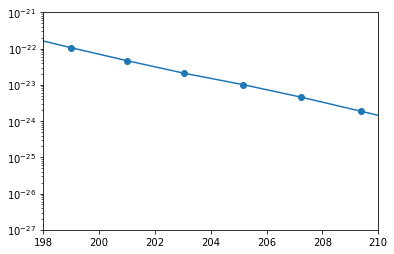

In [21]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)

ax.plot(photochem.wav[0:118]/10,photochem.sq[photochem.lh2o-1,0,:118],'o-')

ax.set_xlim(198,210)
ax.set_ylim(1e-27,1e-21)

ax.set_yscale('log')

In [17]:
photochem.wavl[0:118]

array([1210., 1300., 1350., 1400., 1450., 1500., 1550., 1600., 1650.,
       1700., 1754., 1770., 1786., 1802., 1818., 1835., 1852., 1869.,
       1887., 1905., 1923., 1942., 1961., 1980., 2000., 2020., 2041.,
       2062., 2083., 2105., 2128., 2151., 2174., 2200., 2222., 2247.,
       2273., 2299., 2326., 2353., 2381., 2410., 2439., 2469., 2500.,
       2532., 2564., 2597., 2632., 2667., 2703., 2740., 2778., 2817.,
       2857., 2899., 2941., 2985., 3030., 3077., 3125., 3175., 3225.,
       3275., 3325., 3375., 3425., 3450., 3550., 3650., 3750., 3850.,
       3950., 4050., 4150., 4250., 4350., 4450., 4550., 4650., 4750.,
       4850., 4950., 5050., 5150., 5250., 5350., 5450., 5550., 5650.,
       5750., 5850., 5950., 6050., 6150., 6250., 6350., 6450., 6550.,
       6650., 6750., 6850., 6950., 7050., 7150., 7250., 7350., 7450.,
       7550., 7650., 7750., 7850., 7950., 8050., 8150., 8250., 8350.,
       8450.])

In [5]:
lower_wv = 121 # lower bound of consideration (nm)
upper_wv = 800 # upper bound

def photgrid(star_file):
    wv,I = np.loadtxt(star_file).T
    bins = np.linspace(lower_wv,upper_wv,nw+1)
    # calculate photons/cm2/s for each bin
    F = np.zeros(nw)
    for j in range(len(bins)-1):
        ind = np.where((wv>bins[j]) & (wv<bins[j+1]))[0]
        c = 3e8 #m/s2
        h = 6.62607004e-34 #Planks constant in SI units
        FF = 0
        for i in ind:
            E = h*c/(wv[i]*1e-9) # joules/photon
            FF += I[i]*(wv[i+1]-wv[i])/1e7/E #photons/(cm2 s)
        F[j] = FF
    return F

In [6]:
Flux = photgrid('input/sun_flux.txt')

In [7]:
photochem.flux = Flux

In [13]:
def profile2dic(filename):
    file = open(filename,'r')
    lines = file.readlines()
    key = lines[0].split()
    #build dictionary of output
    out = []
    for i in range(1,len(lines)):
        tmp = []
        for j in lines[i].split():
            try:
                tmp.append(float(j))
            except ValueError:
                tmp.append(0)
        out.append(tmp)
    out = np.array(out)

    f_out = {}
    for i in range(0,len(key)):
        f_out[key[i]]=out[:,i]
    file.close()

    return f_out

In [14]:
# loads atmosphere
f = profile2dic('atmosphere.txt')
usol = np.zeros([63,200])
k= 0
for i,key in enumerate(f.keys()):
    if i>3:
        usol[k] = f[key]
        k+=1

In [16]:
usol.flatten(order='F')

array([2.496e-16, 8.885e-16, 6.294e-03, ..., 3.436e-12, 1.000e-04,
       9.992e-01])

In [17]:
usol[:,0]

array([2.496e-16, 8.885e-16, 6.294e-03, 1.027e-11, 1.788e-15, 1.872e-17,
       3.890e-17, 1.860e-04, 6.604e-08, 6.924e-13, 3.724e-16, 8.232e-16,
       4.717e-03, 1.318e-11, 2.434e-15, 1.629e-17, 4.876e-17, 1.860e-04,
       6.607e-08, 6.593e-13, 6.161e-16, 7.930e-16, 3.373e-03, 1.583e-11,
       3.061e-15, 1.491e-17, 6.276e-17, 1.860e-04, 6.612e-08, 6.159e-13,
       1.126e-15, 7.769e-16, 2.387e-03, 1.866e-11, 3.772e-15, 1.396e-17,
       8.115e-17, 1.860e-04, 6.619e-08, 5.711e-13, 2.217e-15, 7.699e-16,
       1.672e-03, 2.182e-11, 4.611e-15, 1.329e-17, 1.042e-16, 1.860e-04,
       6.630e-08, 5.272e-13, 4.569e-15, 7.830e-16, 1.131e-03, 2.497e-11,
       5.542e-15, 1.305e-17, 1.317e-16, 1.860e-04, 6.645e-08, 4.827e-13,
       9.465e-15, 1.000e-04, 9.792e-01])

In [18]:
lda = len(usol[:,0])*3+1
t = 0.0
jacob = photochem.jacobian(t,usol.flatten(order='F'),lda)

In [20]:
jacob.shape

(190, 12600)

In [12]:
# here we will read in species
fil = open('input/species.dat','r')
lines = fil.readlines()
for line in lines:
    if line[0] == '*':
#         print(line,end='')
        pass